In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

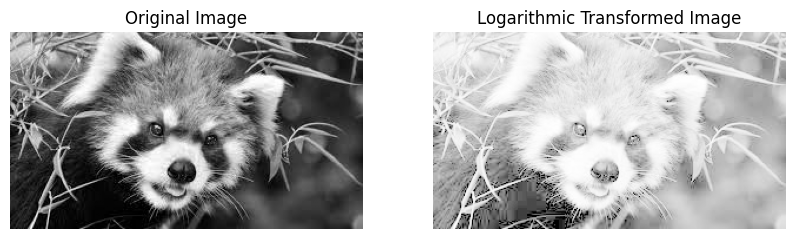

In [6]:
# Load image in grayscale
img = cv2.imread('panda.jpg', 0)

# Apply logarithmic transformation
c = 255 / np.log(1 + np.max(img))  # Normalization constant
log_transformed = c * np.log(1 + img.astype(np.float64))

# Convert back to 8-bit format
log_transformed = np.array(log_transformed, dtype=np.uint8)

# Display original and transformed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(log_transformed, cmap='gray')
plt.title("Logarithmic Transformed Image")
plt.axis('off')

plt.show()

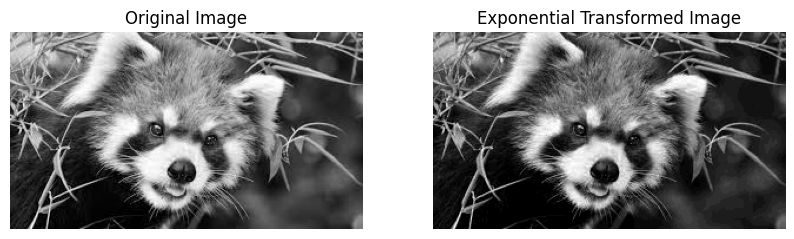

In [7]:
# Apply exponential transformation
c = 255 / (np.max(img) ** 0.5)  # Normalization constant for exponential scaling
exp_transformed = c * (np.exp(img.astype(np.float64) / 255) - 1)

# Clip the values to fit within the valid 0-255 range
exp_transformed = np.clip(exp_transformed, 0, 255)

# Convert back to 8-bit format
exp_transformed = np.array(exp_transformed, dtype=np.uint8)

# Display original and transformed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(exp_transformed, cmap='gray')
plt.title("Exponential Transformed Image")
plt.axis('off')

plt.show()

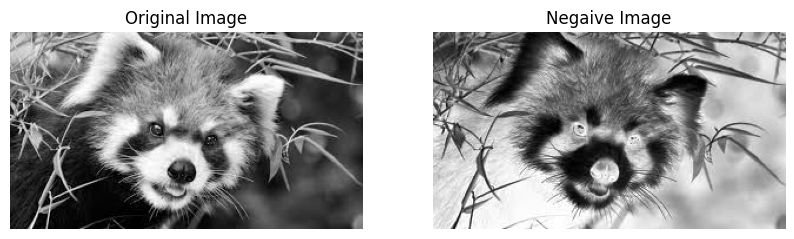

In [10]:
img = cv2.imread('panda.jpg', 0)

img_hasil = 255 - img

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_hasil, cmap='gray')
plt.title("Negaive Image")
plt.axis('off')

plt.show()

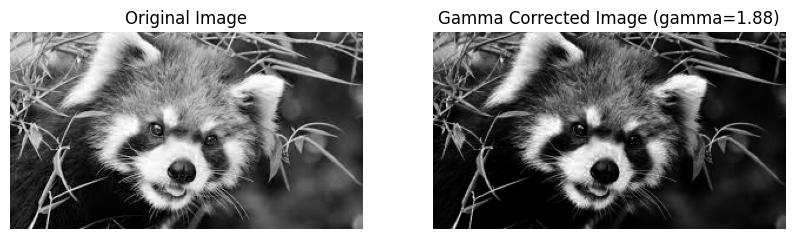

In [20]:
# Power-law (Gamma correction) transformation
gamma = 1.88
c = 255 / np.max(img)  # Normalization constant
gamma_corrected = c * np.power(img / 255.0, gamma)

# Convert back to 8-bit format
gamma_corrected = np.array(gamma_corrected * 255, dtype=np.uint8)

# Display original and gamma-corrected images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected, cmap='gray')
plt.title(f"Gamma Corrected Image (gamma={gamma})")
plt.axis('off')

plt.show()

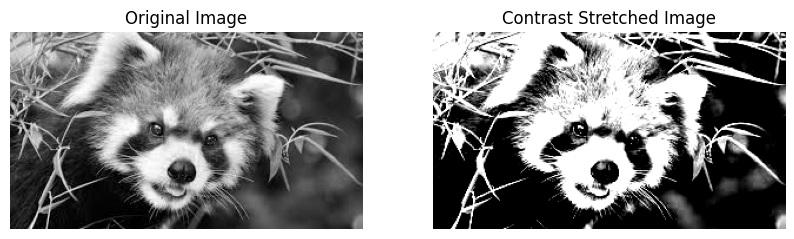

In [22]:
# Load image in grayscale
img5 = cv2.imread('panda.jpg', 0)

# Define control points (example)
r1, s1 = 70, 0    # Titik pertama (input, output)
r2, s2 = 150, 255  # Titik kedua (input, output)

# Create transformation function
def contrast_stretching(pixel):
    if pixel < r1:
        return (s1 / r1) * pixel
    elif pixel < r2:
        return ((s2 - s1) / (r2 - r1)) * (pixel - r1) + s1
    else:
        return ((255 - s2) / (255 - r2)) * (pixel - r2) + s2

# Apply transformation
vectorized_function = np.vectorize(contrast_stretching)
stretched_img5 = vectorized_function(img5).astype(np.uint8)

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img5, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(stretched_img5, cmap='gray')
plt.title("Contrast Stretched Image")
plt.axis('off')

plt.show()

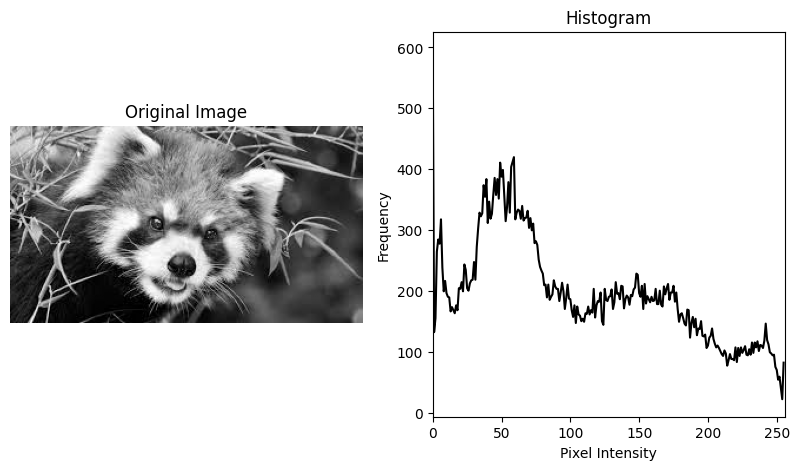

In [24]:
# Load image in grayscale
img6 = cv2.imread('panda.jpg', 0)

# Compute histogram
histogram, bins = np.histogram(img6.flatten(), 256, [0,256])

# Plot histogram
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img6, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(histogram, color='black')
plt.title("Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 256])

plt.show()

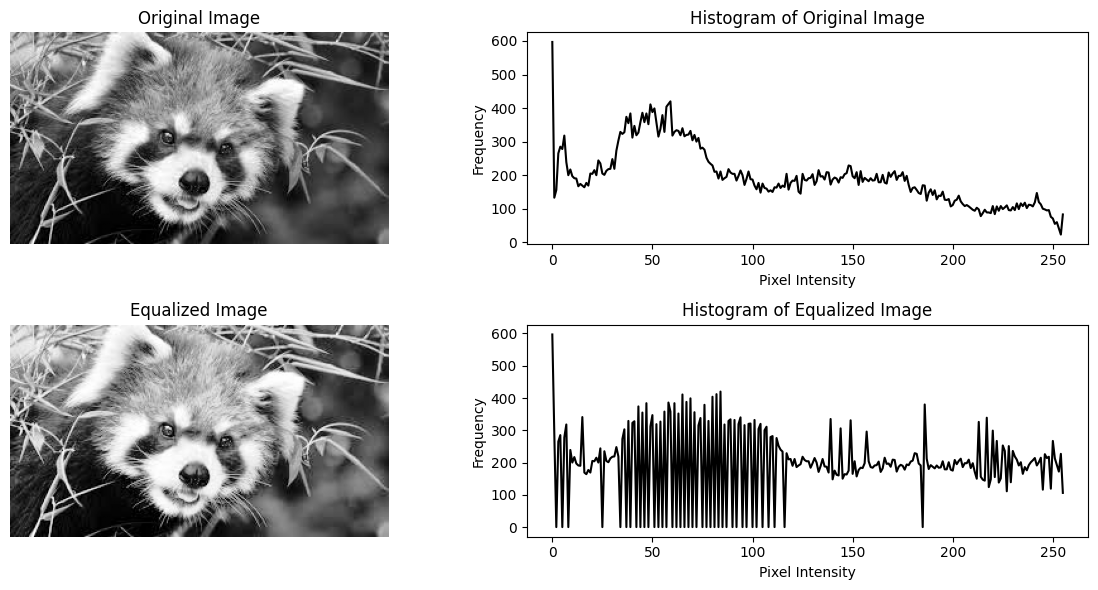

In [26]:
# Load image in grayscale
img7 = cv2.imread('panda.jpg', 0)

# Apply Histogram Equalization
equalized_img7 = cv2.equalizeHist(img7)

# Compute histograms
hist_original = cv2.calcHist([img7], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([equalized_img7], [0], None, [256], [0, 256])

# Plot original and equalized images
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(img7, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Histogram of Original Image
plt.subplot(2, 2, 2)
plt.plot(hist_original, color='black')
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Equalized Image
plt.subplot(2, 2, 3)
plt.imshow(equalized_img7, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')

# Histogram of Equalized Image
plt.subplot(2, 2, 4)
plt.plot(hist_equalized, color='black')
plt.title("Histogram of Equalized Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

<ipython-input-27-7ddf7b45d95a>:22: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img8.ravel(), 256, [0, 256], color='black')
<ipython-input-27-7ddf7b45d95a>:35: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equalized_img8.ravel(), 256, [0, 256], color='black')
<ipython-input-27-7ddf7b45d95a>:48: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(clahe_img8.ravel(), 256, [0, 256], color='black')


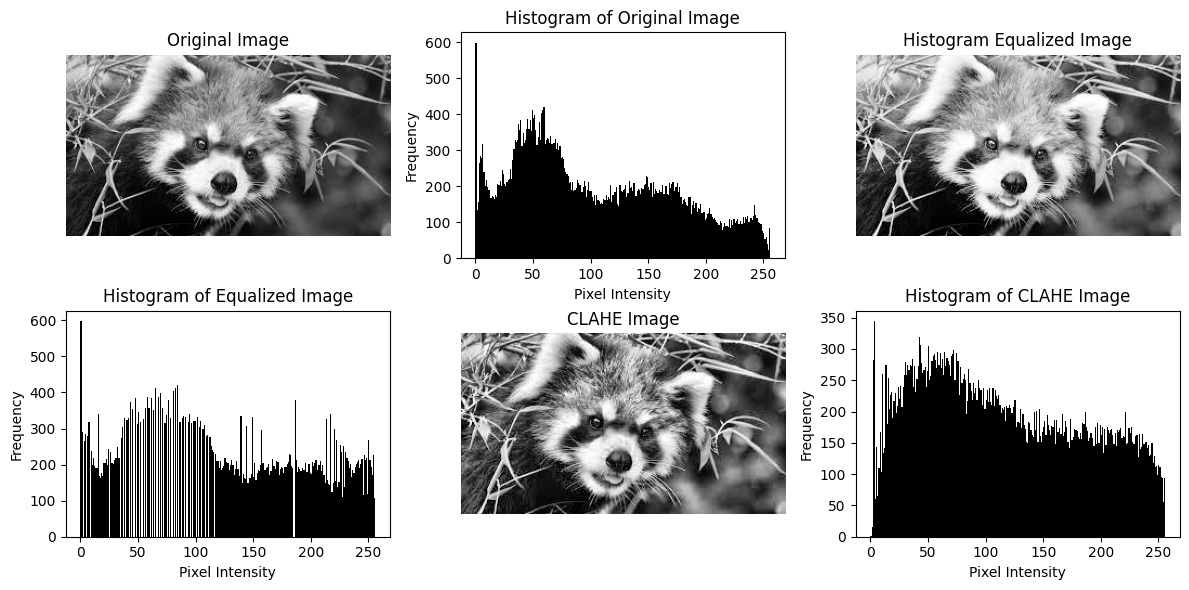

In [27]:
# Load image in grayscale
img8 = cv2.imread('panda.jpg', 0)

# Apply Histogram Equalization (HE)
equalized_img8 = cv2.equalizeHist(img8)

# Apply CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  # Atur parameter
clahe_img8 = clahe.apply(img8)

# Plot images
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(img8, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Histogram of Original Image
plt.subplot(2, 3, 2)
plt.hist(img8.ravel(), 256, [0, 256], color='black')
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Histogram Equalized Image
plt.subplot(2, 3, 3)
plt.imshow(equalized_img8, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis('off')

# Histogram of Equalized Image
plt.subplot(2, 3, 4)
plt.hist(equalized_img8.ravel(), 256, [0, 256], color='black')
plt.title("Histogram of Equalized Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# CLAHE Image
plt.subplot(2, 3, 5)
plt.imshow(clahe_img8, cmap='gray')
plt.title("CLAHE Image")
plt.axis('off')

# Histogram of CLAHE Image
plt.subplot(2, 3, 6)
plt.hist(clahe_img8.ravel(), 256, [0, 256], color='black')
plt.title("Histogram of CLAHE Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()